<a href="https://colab.research.google.com/github/EricRaniere/Projetos-Estudos/blob/main/AnaliseAirbnbAmsterdan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science na Prática

Éric Costa

Módulo 01

---

O [Airbnb](https://news.airbnb.com/about-us/) é hoje a principal plataforma de compartilhamento e oferta de hospedagem do mundo. 

O negócio criado em 2007 é atualmente responsável por **5.6 milhões de anúncios ativos** de hospedagem espalhados por **100.000 cidades** em mais de **220 países**[*](https://news.airbnb.com/about-us/). 

Sua rede hoje conta com mais de **4 milhões de Anfitriões**, pessoas que oferencem seus imóveis na plataforma, gerando uma receita média de **$7.900,00 por ano** para cada Anfitrião. 

Uma das iniciativas mais interessantes do Airbnb é o fato da empresa disponibilizar dados da sua plataforma para fomentar o estudo e desenvolvimento de insights. Os dados disponibilizados são previamente tratados e anonimizados, evitando a quebra de sigilo dos seus usuários. Todos os dados estão públicados na plataforma [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesse notebook vou realizar a primeira tarefa do curso **Data Science na Prática** da **[Sigmoidal](https://sigmoidal.ai/)** e analisar os dados da cidade de **Amsterdão**, a idéia é extrair o máximo de insights relevantes sobre a base de dados.




## Obtenção dos Dados


Para a análise exploratória inicial, irei utilizar o seguinte arquivo:

* `listings.csv`
 


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-04-09/visualisations/listings.csv")

## Análise dos Dados
Nessa etapa vou buscar entender como os dados estão estruturados e buscar relacionar a que cada variável esta associada.


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

`listings.csv.gz`

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 17825
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.134642
last_review                       0.134642
host_name                         0.033380
name                              0.001795
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

#### Q2.1 Eliminar colunas com dados totalmente ausentes
Com o comando anterior temos a conclusão de que a coluna `neighbourhood_group`pode ser eliminada do nosso DataSet.

In [6]:
#criando uma cópia do DF para limpeza. Objetivo de ter um backup.
df_clean=df.copy()
#eliminando a coluna neighbourhood_group, que está totalmente vazia
df_clean.drop('neighbourhood_group',axis=1,inplace=True)
# ordenar novamente em ordem decrescente as variáveis por seus valores ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.134642
last_review                       0.134642
host_name                         0.033380
name                              0.001795
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

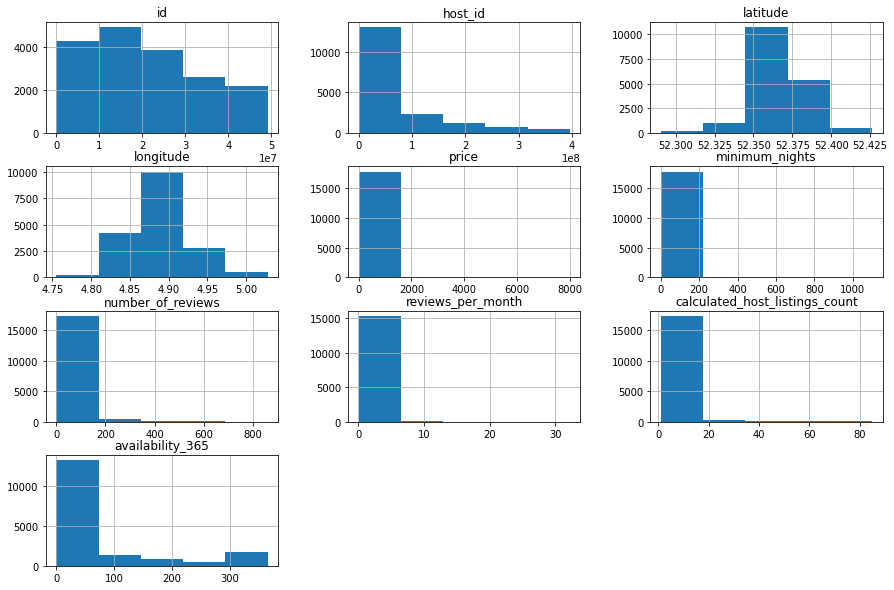

In [7]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=5,figsize=(15,10));

####Q.3.1 Normalizando Outliers
Com os Histogramas foi possível verificar que existem `outliers` no nosso dataset. Em especial nas colunas `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`.




In [8]:
df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,17825.000000,17825.000000,17825.000000,15425.000000,17825.000000
mean,154.495877,3.867041,23.952875,0.562200,2.684376
std,154.162566,18.732039,54.831150,1.017706,8.813855
min,0.000000,1.000000,0.000000,0.010000,1.000000
25%,95.000000,2.000000,2.000000,0.120000,1.000000
50%,129.000000,2.000000,8.000000,0.260000,1.000000
75%,180.000000,3.000000,21.000000,0.540000,1.000000
max,8000.000000,1100.000000,860.000000,32.190000,85.000000


Algumas análises podem ser feitas com os dados acima.

A média de valores da coluna `price` é de 154.162 e 75% dos seus valores estão no valor de até 180.00 porém seu valor máximo chegou a 8000.00 

Mesma análise pode ser realizada na coluna `minimum_nights`, sua mediana é de 3.86 e 75% dos seus valores estão em até 3 diárias, mas seu valor máximo é de 1100, fazendo com que sua média distoe da mediana e chegue a 18.73. 

#####Q.3.1.1 Minimum Nights

minimum_nights: valores acima de 10:
496 entradas
2.78%
minimum_nights: valores acima de 20:
270 entradas
1.51%
minimum_nights: valores acima de 30:
95 entradas
0.53%
minimum_nights: valores acima de 40:
87 entradas
0.49%
minimum_nights: valores acima de 50:
78 entradas
0.44%


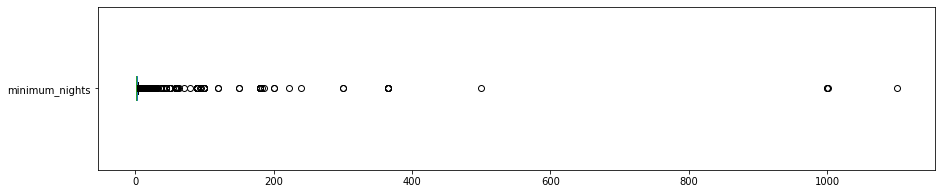

In [9]:
#verificando outliers com Box_plot
#minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 10:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 10])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 10])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 20:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 20])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 20])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 30])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 30])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 40:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 40])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 40])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 50:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 50])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 50])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *30 noites* ou mais representa um total de *95* entradas, que representa *0.53%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados.


#####Q.3.1.2 Price

price: valores acima de 400:
414 entradas
2.32%
price: valores acima de 500:
195 entradas
1.09%
price: valores acima de 600:
118 entradas
0.66%
price: valores acima de 700:
95 entradas
0.53%
price: valores acima de 800:
61 entradas
0.34%


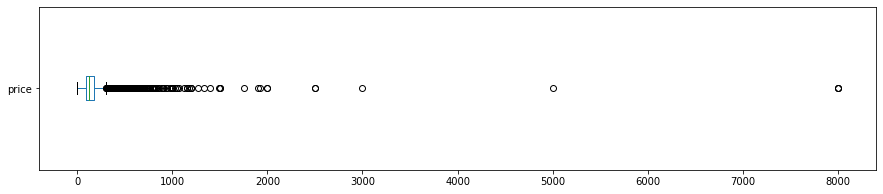

In [10]:
#verificando outliers com Box_plot
#price
df_clean.price.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de $400 para price
print('price: valores acima de 400:')
print('{} entradas'.format(len(df_clean[df_clean.price > 400])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 400])/df_clean.shape[0])*100))
print('price: valores acima de 500:')
print('{} entradas'.format(len(df_clean[df_clean.price > 500])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 500])/df_clean.shape[0])*100))
print('price: valores acima de 600:')
print('{} entradas'.format(len(df_clean[df_clean.price > 600])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 600])/df_clean.shape[0])*100))
print('price: valores acima de 700:')
print('{} entradas'.format(len(df_clean[df_clean.price > 700])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 700])/df_clean.shape[0])*100))
print('price: valores acima de 800:')
print('{} entradas'.format(len(df_clean[df_clean.price > 800])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 800])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *700$* ou mais representa um total de *95* entradas, que representa *0.53%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados. Por coincidência os mesmos valores da análise anterior.


#####Q.3.1.3 number_of_reviews

number_of_reviews: valores acima de 200:
371 entradas
2.08%
number_of_reviews: valores acima de 250:
266 entradas
1.49%
number_of_reviews: valores acima de 300:
163 entradas
0.91%
number_of_reviews: valores acima de 300:
163 entradas
0.91%
number_of_reviews: valores acima de 350:
110 entradas
0.62%


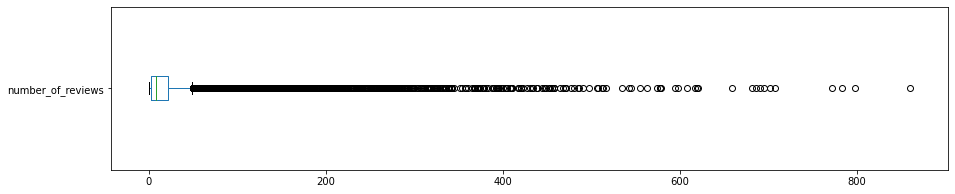

In [11]:
#verificando outliers com Box_plot
#number_of_reviews
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 30 dias para number_of_reviews
print('number_of_reviews: valores acima de 200:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 200])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 200])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 250:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 250])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 250])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 300:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 300])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 300])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 300:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 300])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 300])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 350:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 350])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 350])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *350 reviews* ou mais representa um total de *110* entradas, que representa *0.62%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados. Por coincidência os mesmos valores da análise anterior.


#####Q.3.1.4 reviews_per_month

reviews_per_month: valores acima de 3:
570 entradas
3.20%
reviews_per_month: valores acima de 4:
283 entradas
1.59%
reviews_per_month: valores acima de 5:
134 entradas
0.75%
reviews_per_month: valores acima de 6:
62 entradas
0.35%
reviews_per_month: valores acima de 7:
32 entradas
0.18%


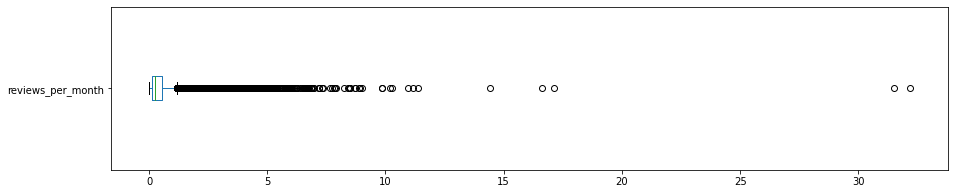

In [12]:
#verificando outliers com Box_plot
#reviews_per_month
df_clean.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 3 reviews_per_month
print('reviews_per_month: valores acima de 3:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 3])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 3])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 4:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 4])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 4])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 5:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 5])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 5])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 6:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 6])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 6])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 7:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 7])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 7])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *5 reviews* ou mais representa um total de *134 entradas, que representa *0.75%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados. Por coincidência os mesmos valores da análise anterior.


#####Q.3.1.5 calculated_host_listings_count

calculated_host_listings_count: valores acima de 10:
610 entradas
3.42%
calculated_host_listings_count: valores acima de 20:
354 entradas
1.99%
calculated_host_listings_count: valores acima de 30:
284 entradas
1.59%
calculated_host_listings_count: valores acima de 40:
218 entradas
1.22%
calculated_host_listings_count: valores acima de 50:
218 entradas
1.22%


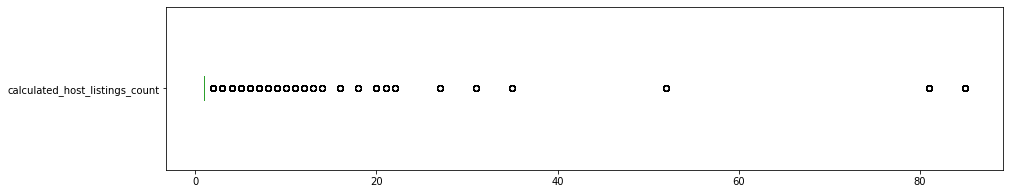

In [13]:
#verificando outliers com Box_plot
#calculated_host_listings_count
df_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 10 calculated_host_listings_count
print('calculated_host_listings_count: valores acima de 10:')
print('{} entradas'.format(len(df_clean[df_clean.calculated_host_listings_count > 10])))
print('{:.2f}%'.format((len(df_clean[df_clean.calculated_host_listings_count > 10])/df_clean.shape[0])*100))
print('calculated_host_listings_count: valores acima de 20:')
print('{} entradas'.format(len(df_clean[df_clean.calculated_host_listings_count > 20])))
print('{:.2f}%'.format((len(df_clean[df_clean.calculated_host_listings_count > 20])/df_clean.shape[0])*100))
print('calculated_host_listings_count: valores acima de 30:')
print('{} entradas'.format(len(df_clean[df_clean.calculated_host_listings_count > 30])))
print('{:.2f}%'.format((len(df_clean[df_clean.calculated_host_listings_count > 30])/df_clean.shape[0])*100))
print('calculated_host_listings_count: valores acima de 40:')
print('{} entradas'.format(len(df_clean[df_clean.calculated_host_listings_count > 40])))
print('{:.2f}%'.format((len(df_clean[df_clean.calculated_host_listings_count > 40])/df_clean.shape[0])*100))
print('calculated_host_listings_count: valores acima de 50:')
print('{} entradas'.format(len(df_clean[df_clean.calculated_host_listings_count > 50])))
print('{:.2f}%'.format((len(df_clean[df_clean.calculated_host_listings_count > 50])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *50 unidades* ou mais representa um total de *218* entradas, que representa *1.22%* do nosso volume de dados. Apesar de possuir outliers a granunalidade dos dados é menor que das outras colunas, portanto não iremos excluir dados baseados nessa coluna no momento.


####Q.3.2 Normalizando Outliers
Já que identificamos *outliers* nas variáveis `number_of_reviews`, `reviews_per_month` e `calculated_host_listings_count`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma..




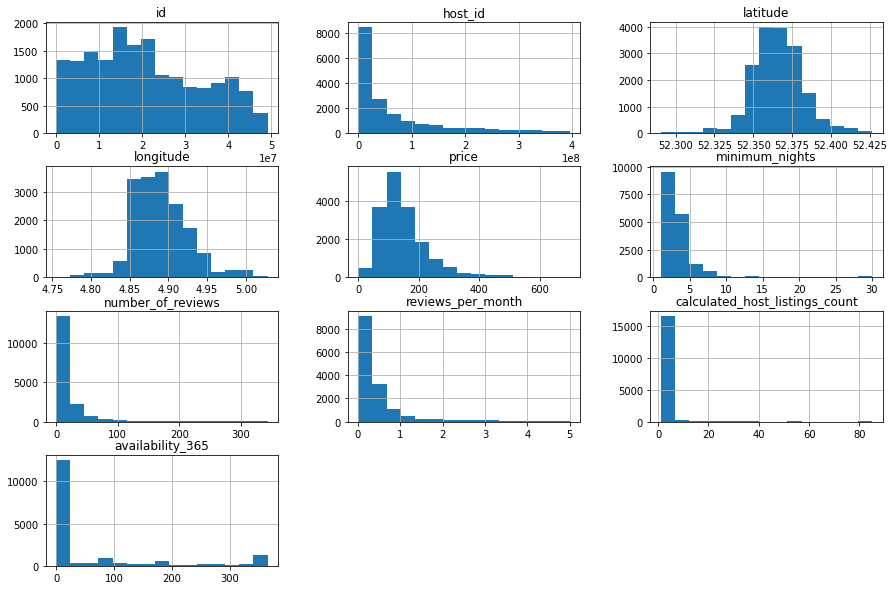

In [14]:
# remover os *outliers* em um novo DataFrame
df_cleaned = df_clean.copy()
df_cleaned.drop(df_cleaned[df_cleaned.minimum_nights > 30].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.price > 700].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.number_of_reviews > 350].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.reviews_per_month > 5].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_cleaned.hist(bins=15, figsize=(15,10));

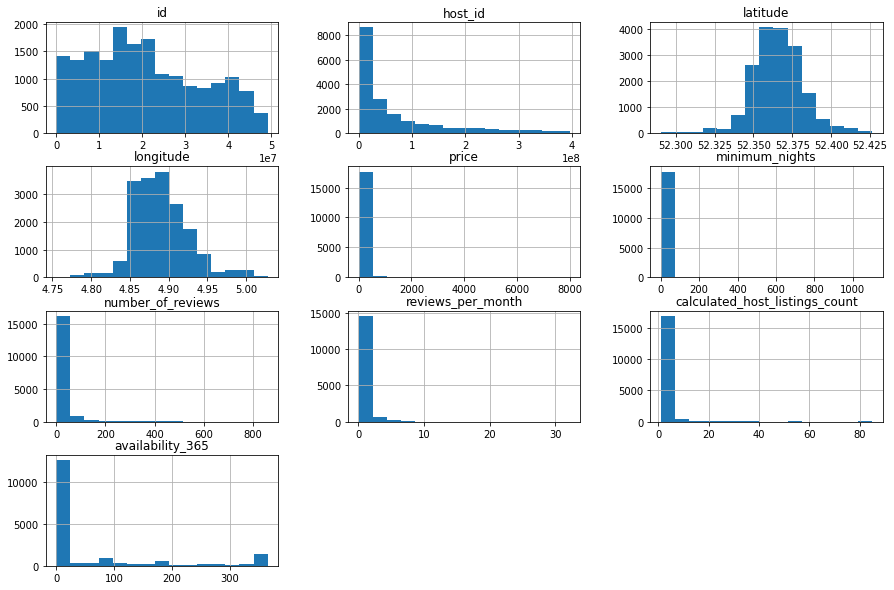

In [15]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15,figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [16]:
# criar uma matriz de correlação
corr = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014237,-0.098161,-0.137408,0.070123,0.101283
minimum_nights,-0.014237,1.000000,-0.061724,-0.092631,-0.030589,0.020005
number_of_reviews,-0.098161,-0.061724,1.000000,0.862386,-0.027711,0.265945
reviews_per_month,-0.137408,-0.092631,0.862386,1.000000,-0.003762,0.325710
calculated_host_listings_count,0.070123,-0.030589,-0.027711,-0.003762,1.000000,0.017209
availability_365,0.101283,0.020005,0.265945,0.325710,0.017209,1.000000


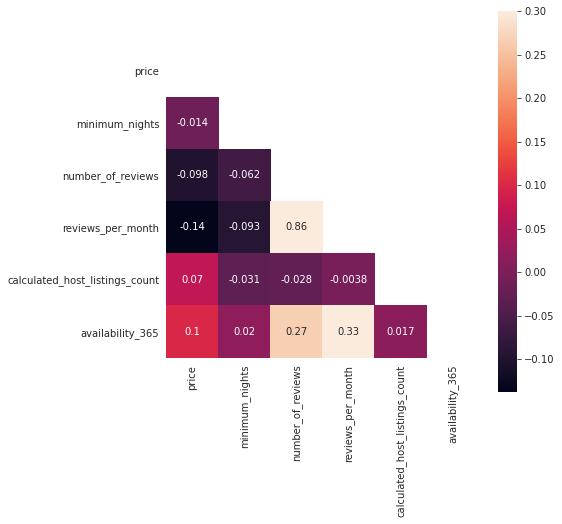

In [17]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linecolor='white', annot=True)


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_cleaned.room_type.value_counts()

Entire home/apt    13723
Private room        3582
Hotel room           114
Shared room           47
Name: room_type, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.779579
Private room       0.210715
Hotel room         0.006957
Shared room        0.002749
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [20]:
# ver preços por bairros, na média
df_cleaned.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-Oost                172.393031
Centrum-West                170.141293
IJburg - Zeeburgereiland    167.101942
Zuid                        163.806827
De Pijp - Rivierenbuurt     157.675229
Watergraafsmeer             148.811069
Westerpark                  147.246544
Oud-Noord                   146.982425
De Baarsjes - Oud-West      146.828601
Oud-Oost                    143.267730
Name: price, dtype: float64

In [21]:
# para plotar um gráfico de dipersão sobre o mapa da cidade é necessário definir as latitudes e longitudes máximas.

BBox = ((df_cleaned.longitude.min(),   df_cleaned.longitude.max(),      
         df_cleaned.latitude.min(), df_cleaned.latitude.max()))

print(BBox)

(4.75493, 5.02799, 52.29034, 52.426390000000005)


In [22]:
# carregar imagem do mapa da cidade
ams_m = plt.imread('/content/amsterdam.png')

FileNotFoundError: ignored

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df_cleaned.longitude, df_cleaned.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ams_m, zorder=0, extent = BBox, aspect= 'equal')

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_cleaned.minimum_nights.mean()

In [ ]:
df_cleaned.minimum_nights.value_counts().sort_values(ascending=False)[:30]

## Conclusões
